<a href="https://colab.research.google.com/github/nithinrk11/Feynn-Labs-Machine-Learning-Internship/blob/main/Project%202B/Gender_Demographic_and_Geographic_based_Segmentation_on_the_Indian_EV_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Gender Demographic and Geographic based Segmentation on the Indian EV market.
The Datasets used here are:
* 'State/UTs-wise Current Sales of Electric Vehicles (EV)'[link](https://www.data.gov.in/resource/stateuts-wise-current-sales-electric-vehicles-ev-country-various-segments-reply-unstarred) in the Country
*For employment rate the 'State/UT-wise Details of Unemployment Rate during during 2022-23 and 2023-24 July 2022-June 2023'[link](https://www.data.gov.in/resource/stateut-wise-details-unemployment-rate-ur-according-usual-status-psss-each-age-group-15), this dataset is used as proxy for the unavailability of gender demographic data, the dataset is processed to gain insights on the employment rates across various states which we will go through later in this notebook.
* Both the datasets were collected from data.gov.in portal
---

###Installing Dependencies

In [ ]:
!pip install yellowbrick
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer
import warnings

###Load the Datasets

In [ ]:
!git clone https://github.com/nithinrk11/Feynn-Labs-Machine-Learning-Internship.git
%cd Feynn-Labs-Machine-Learning-Internship

Cloning into 'Feynn-Labs-Machine-Learning-Internship'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 100 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 2.44 MiB | 12.38 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/Feynn-Labs-Machine-Learning-Internship/Feynn-Labs-Machine-Learning-Internship


In [ ]:
df1 = pd.read_csv('/content/Feynn-Labs-Machine-Learning-Internship/Project 2B/Datasets/(State wise EV sales) RS_Session_256_AU_95_C.csv')

In [ ]:
df2 = pd.read_csv('/content/Feynn-Labs-Machine-Learning-Internship/Project 2B/Datasets/(unemployement rate)RS_Session_263_AU_309_1.csv')

###Data Preprocessing

In [ ]:
df1.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [ ]:
#convert all NaN into 0
df1.fillna(0, inplace=True)


In [ ]:
df1.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931


In [ ]:
df2.head()

,Sl. No.,State/UT,Rural - Male,Rural - Female,Rural - Person,Urban - Male,Urban - Female,Urban - Person,Rural + Urban - Male,Rural + Urban - Female,Rural + Urban - Person
0,1,Andhra Pradesh,3.5,3.0,3.3,6.0,7.5,6.5,4.2,4.0,4.1
1,2,Arunachal Pradesh,4.5,3.1,3.9,7.9,16.9,10.9,5.0,4.5,4.8
2,3,Assam,1.2,2.7,1.5,3.6,12.7,6.1,1.3,3.4,1.7
3,4,Bihar,4.4,1.1,3.6,7.4,9.8,7.7,4.6,1.6,3.9
4,5,Chhattisgarh,1.9,0.9,1.4,6.8,10.2,7.8,2.8,2.0,2.4


#Extracting Segments

##Performing Principle Component Analysis on the Sales Dataset `df1`

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Perform PCA and K-Means
X = df1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle','Other']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
from sklearn.cluster import KMeans # Import KMeans
kmeans = KMeans(n_clusters=5, random_state=42) # You can adjust the number of clusters as needed
clusters = kmeans.fit_predict(X_pca) # Generate cluster assignments

# Create a DataFrame for PCA results
pca_df1 = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
pca_df1['Cluster'] = clusters

# Output the loadings for reference
# Get PCA components (loadings)
components = pca.components_.T
loadings_df1 = pd.DataFrame(components, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
print("PCA Loadings:")
loadings_df1

PCA Loadings:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Two Wheeler,0.362277,-0.102897,-0.109742,-0.021568,-0.113021,0.331008,0.081201,0.067151,0.843929
Three Wheeler,0.338841,-0.131014,-0.169560,0.508873,0.641057,-0.187507,-0.343119,-0.124349,0.031831
Four Wheeler,0.349340,-0.143862,-0.149029,-0.498528,0.111184,-0.220767,-0.197855,0.684426,-0.133566
Goods Vehicles,0.333569,0.424741,-0.074249,-0.035571,-0.020546,0.703096,-0.287797,-0.044289,-0.349277
Public Service Vehicle,0.345369,-0.200238,0.097486,0.521479,-0.209345,0.090098,0.549354,0.347867,-0.290580
Special Category Vehicles,0.291664,-0.179301,0.900939,-0.156010,0.067781,-0.004565,-0.134598,-0.154974,0.002253
Ambulance/Hearses,0.341428,-0.175635,-0.192968,0.077104,-0.678217,-0.314319,-0.375948,-0.315929,-0.097337
Construction Equipment Vehicle,0.283831,0.801231,0.104190,0.034852,-0.017476,-0.452486,0.197591,0.013977,0.145300
Other,0.345187,-0.161503,-0.249394,-0.432838,0.234063,-0.022680,0.503404,-0.514386,-0.178629


* PC1 and PC2 Captures the most loading.


In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Import the adjusted_rand_score function
X = df1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']]
# Range of number of clusters to test
num_segments = range(3, 10)
segment_solutions = []

for k in num_segments:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    segment_solutions.append(kmeans)
# Calculate ARI for each segmentation
ari_4scores = []
for i in range(len(segment_solutions) - 1):
    ari4 = adjusted_rand_score(segment_solutions[i].labels_, segment_solutions[i + 1].labels_)
    ari_4scores.append(ari4)

# Print ARI scores
for i, score in enumerate(ari_4scores):
    print(f"ARI between {i+2} and {i+3} segments: {score:.2f}")

ARI between 2 and 3 segments: 0.58
ARI between 3 and 4 segments: 0.65
ARI between 4 and 5 segments: 0.97
ARI between 5 and 6 segments: 0.82
ARI between 6 and 7 segments: 0.63
ARI between 7 and 8 segments: 0.89


> 4 is the most appropriate number of segments for your data (based on Adjusted Rand Index). This indicates that there are 4 distinct clusters in the data, which can be interpreted as 4 different market segments for vehicles

##K-Means elbow visualiser for optimal nunber of segments in df1

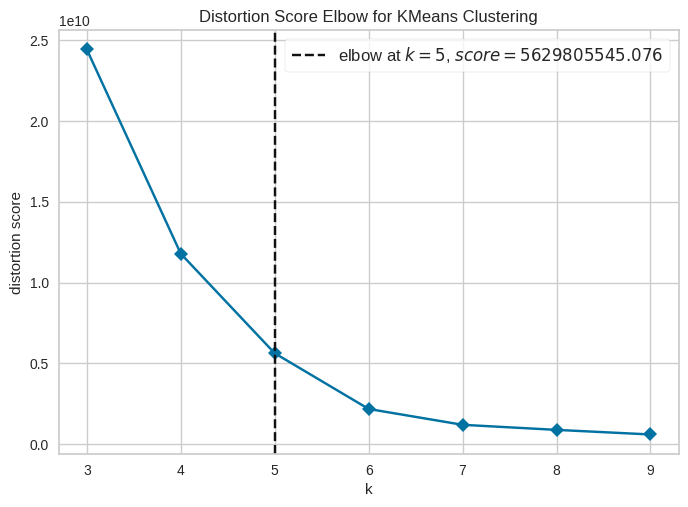

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

X = df1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']]
# Instantiate the KElbowVisualizer with KMeans
visualizer = KElbowVisualizer(KMeans(), k=(3,10), timings=False)

# Fit the visualizer to the data
visualizer.fit(X)

# Finalize and render the figure
visualizer.show()


> We can confirm that the optimal number of Segments for sales dataset is 5

##Profiling the Segments

* Lets perform K-Means with the found optimal 5 clusters and observe the cluster profiles

In [ ]:
# Perform K-means clustering with 5 segments
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init='auto')
clusters_5 = kmeans_5.fit_predict(X)

# Add cluster labels to the DataFrame
df1['Cluster_5'] = clusters_5

# Analyze cluster centers
cluster_centers_5 = pd.DataFrame(kmeans_5.cluster_centers_, columns=X.columns)
print("Cluster Centers for 5 Segments:")
cluster_centers_5



Cluster Centers for 5 Segments:


,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other
0,3604.777778,9262.703704,581.074074,54.444444,27.444444,14.111111,0.148148,14.703704,21.592593
1,282542.000000,647186.000000,26335.000000,3036.000000,2039.000000,410.000000,6.000000,397.000000,4412.000000
2,14730.000000,112831.000000,3051.000000,49.000000,39.000000,0.000000,0.000000,0.000000,1602.000000
3,18295.000000,257159.000000,368.000000,53.000000,327.000000,2.000000,0.000000,0.000000,13.000000
4,50729.333333,9034.333333,2409.000000,488.000000,310.666667,9.000000,0.666667,0.000000,738.000000


Focusing on Two Wheelers, Three Wheelers, and Four Wheelers for further market segmentation is a logical approach based on the Segment profiles:

* Segment 2: High values in Two Wheelers and Three Wheelers.
* Segment 3: High values in Three Wheelers and Four Wheelers.
* Segment 4: Medium to high values across various vehicle types, including Two Wheelers, Three Wheelers, and Four Wheelers.
> Why Focus on These Categories?
* High Representation: These Segments show strong representation in Two Wheelers, Three Wheelers, and Four Wheelers. This indicates significant market activity or potential in these segments.
* Diverse Market Needs: By focusing on these vehicle types, you address a diverse set of needs and opportunities in the market, which could be beneficial for segmentation and targeting.

> Now that we understand which vehicle types to focus on for market segmentation let us head to perform segmentation with EV Sales and Employment rate across the states.
---

###Feature Extraction

* Comparing the `State Name from df1` and `State/UT from df2` and display unique values

In [ ]:
# Find unique values in both columns
df1_states = set(df1['State Name'].unique())
df2_states = set(df2['State/UT'].unique())

# Find unique values in df1 that are not in df2
unique_in_df1 = df1_states - df2_states
print("Unique states in df1 not in df2:", unique_in_df1)

# Find unique values in df2 that are not in df1
unique_in_df2 = df2_states - df1_states
print("Unique states in df2 not in df1:", unique_in_df2)


Unique states in df1 not in df2: {'Grand Total', 'Andaman and Nicobar Island'}
Unique states in df2 not in df1: {'Telangana', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Madhya Pradesh', 'All India', 'Lakshadweep'}


> * We can see that there are certain states which are are not present in the employment dataset such as `'Madhya Pradesh', 'Lakshadweep','Telangana', 'Andhra Pradesh'` which lacks data of the employment percentages and `'ALL India', and 'Grand Total'` are `non state varaibles` that is to be removed. lets us process and manage these data.

In [ ]:
#drop all data related to 'Grand Total' in df1
df1 = df1[df1['State Name'] != 'Grand Total']


In [ ]:
#drop all data related to 'All India' in df2

df2 = df2[df2['State/UT'] != 'All India']


> Now by comparing the first word from state names in `df1 and df2` from their respective columns `State Name` and `State/UT`, when matches their corresponding individual value of employment rate is passed from df2 to df1.

In [ ]:
# Extract the first word from the "State Name" column in df1 and convert to lowercase
df1['First_Word_A'] = df1['State Name'].apply(lambda x: str(x).split()[0].lower())

# Extract the first word from the "State/UT" column in df2 and convert to lowercase
df2['First_Word_B'] = df2['State/UT'].apply(lambda x: str(x).split()[0].lower())

# Create a new column in df1 to store the matched state from df2
df1['Matched_State'] = df1['First_Word_A'].map(df2.set_index('First_Word_B')['State/UT'])

# Extract the corresponding 'Rural + Urban - Male' and 'Rural + Urban - Female' values
df1['Rural + Urban - Male'] = df1['Matched_State'].map(df2.set_index('State/UT')['Rural + Urban - Male'])
df1['Rural + Urban - Female'] = df1['Matched_State'].map(df2.set_index('State/UT')['Rural + Urban - Female'])

# Drop the temporary column
df1.drop(columns=['First_Word_A'], inplace=True)

# Display the result
df1

<ipython-input-18-17ee33bb0dee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['First_Word_A'] = df1['State Name'].apply(lambda x: str(x).split()[0].lower())
<ipython-input-18-17ee33bb0dee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['First_Word_B'] = df2['State/UT'].apply(lambda x: str(x).split()[0].lower())
<ipython-input-18-17ee33bb0dee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,Cluster_5,Matched_State,Rural + Urban - Male,Rural + Urban - Female
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,0,Andaman and Nicobar Islands,4.0,19.8
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,0,Arunachal Pradesh,5.0,4.5
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,0,Assam,1.3,3.4
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,0,Bihar,4.6,1.6
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,0,Chandigarh,4.3,2.9
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428,0,Chhattisgarh,2.8,2.0
6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302,2,Delhi,1.8,2.2
7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686,0,Goa,7.7,14.7
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593,0,Gujarat,1.9,1.3
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780,0,Haryana,6.4,4.7


* Drop all the unwanted EV categories from the processed df1 dataframe and the 'Matched_State' column.

In [ ]:
#drop columns 4 to 10
df1 = df1.drop(df1.columns[4:11], axis=1)


In [ ]:
df1 = df1.drop('Matched_State', axis=1)

In [ ]:
df1 = df1.drop('Cluster_5', axis=1)

In [ ]:
df1.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Rural + Urban - Male,Rural + Urban - Female
0,Andaman and Nicobar Island,1,30.0,81,4.0,19.8
1,Arunachal Pradesh,14,0.0,5,5.0,4.5
2,Assam,721,47041.0,161,1.3,3.4
3,Bihar,5003,59079.0,114,4.6,1.6
4,Chandigarh,298,1410.0,182,4.3,2.9


> ### One of the main objective to conside inverting the unemployment rates out of 100 to get the statitics of employment rates acrosse the states in the nation. lets perform that now:

In [ ]:
#invert the data inside Rural + Urban - Male out vof hundred
df1['Rural + Urban - Male'] = 100 - df1['Rural + Urban - Male']

In [ ]:
# Invert the values in the 'Rural + Urban - Female' column
df1['Rural + Urban - Female'] = 100 - df1['Rural + Urban - Female']

In [ ]:
df1.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Rural + Urban - Male,Rural + Urban - Female
0,Andaman and Nicobar Island,1,30.0,81,96.0,80.2
1,Arunachal Pradesh,14,0.0,5,95.0,95.5
2,Assam,721,47041.0,161,98.7,96.6
3,Bihar,5003,59079.0,114,95.4,98.4
4,Chandigarh,298,1410.0,182,95.7,97.1


##Segment Extraction

> ### Performing **Principle Component Analysis** on variables: `'Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Male', 'Rural + Urban - Female'`

In [ ]:
# Perform PCA and K-Means
X = df1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Male', 'Rural + Urban - Female']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
from sklearn.cluster import KMeans # Import KMeans
kmeans = KMeans(n_clusters=5, random_state=42) # You can adjust the number of clusters as needed
clusters = kmeans.fit_predict(X_pca) # Generate cluster assignments

# Create a DataFrame for PCA results
pca_df1 = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df1['Cluster'] = clusters

# Output the loadings for reference
# Get PCA components (loadings)
components = pca.components_.T
loadings_df1 = pd.DataFrame(components, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print("PCA Loadings:")
loadings_df1

PCA Loadings:


,PC1,PC2,PC3,PC4,PC5
Two Wheeler,0.420743,0.544783,0.081794,0.572826,0.437455
Three Wheeler,0.422002,-0.186820,0.855436,-0.233419,-0.027521
Four Wheeler,0.283403,0.672661,-0.162653,-0.585114,-0.313682
Rural + Urban - Male,0.499691,-0.375989,-0.411989,-0.370333,0.549600
Rural + Urban - Female,0.561143,-0.272891,-0.255633,0.371324,-0.638294


> PC1:

* Vehicle Types: High loadings for "Two Wheeler," "Three Wheeler," and "Four Wheeler" suggest that PC1 primarily captures variations in vehicle size or type.
* Employment Rates: Positive loadings for both "Rural + Urban - Male" and "Rural + Urban - Female" indicate that PC1 is also associated with overall employment rates.

> PC2:

* Vehicle Types: A high loading for "Four Wheeler" suggests that PC2 is related to the prevalence of larger vehicles.
* Employment Rates: Negative loadings for both "Rural + Urban - Male" and "Rural + Urban - Female" might indicate that PC2 is associated with lower employment rates.

> -  PC1 and PC2 seem to capture some relationship with overall employment rates

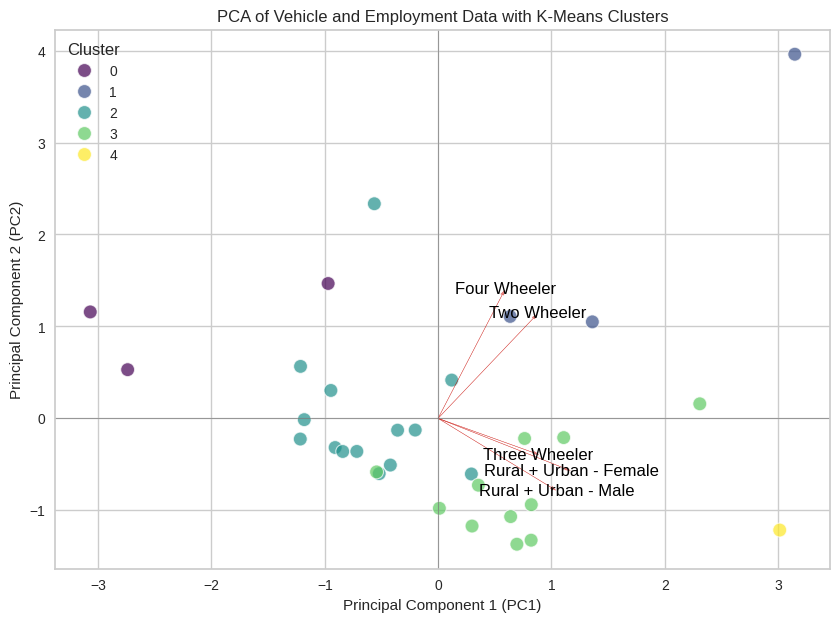

In [ ]:

# Set up the figure and axes
plt.figure(figsize=(10, 7))

# Scatter plot of PC1 vs PC2, colored by the K-Means cluster assignments
sns.scatterplot(x=pca_df1['PC1'], y=pca_df1['PC2'], hue=pca_df1['Cluster'], palette='viridis', s=100, alpha=0.7)

# Add the PCA loadings as arrows
for i, feature in enumerate(loadings_df1.index):
    plt.arrow(0, 0, loadings_df1['PC1'][i]*2, loadings_df1['PC2'][i]*2, color='r', alpha=0.5, head_width=0.03, head_length=0.05)
    plt.text(loadings_df1['PC1'][i]*2.1, loadings_df1['PC2'][i]*2.1, feature, color='black', ha='center', va='center', fontsize=12)

# Set labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Vehicle and Employment Data with K-Means Clusters')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

# Show the plot
plt.show()


>Obervations:
* Cluster Formation: The data points are clustered into distinct groups, suggesting that K-means successfully identified meaningful segments.


> Before continuing towards segment profiling lets check for the correlation of male and female employment rates with the other variables.

In [ ]:
df_ev_sales = df1[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Male', 'Rural + Urban - Female']]

# Calculate correlation
correlation = df_ev_sales.corr()
correlation


,Two Wheeler,Three Wheeler,Four Wheeler,Rural + Urban - Male,Rural + Urban - Female
Two Wheeler,1.000000,0.155726,0.370150,0.073047,0.224887
Three Wheeler,0.155726,1.000000,0.038046,0.224841,0.259571
Four Wheeler,0.370150,0.038046,1.000000,0.053276,0.046506
Rural + Urban - Male,0.073047,0.224841,0.053276,1.000000,0.454678
Rural + Urban - Female,0.224887,0.259571,0.046506,0.454678,1.000000


The correlation matrix has moderately suggest gender-based segmentation, it provides valuable insights into the relationships between variables. Further analysis of gender-specific factors might reveal the need for separate segmentation.

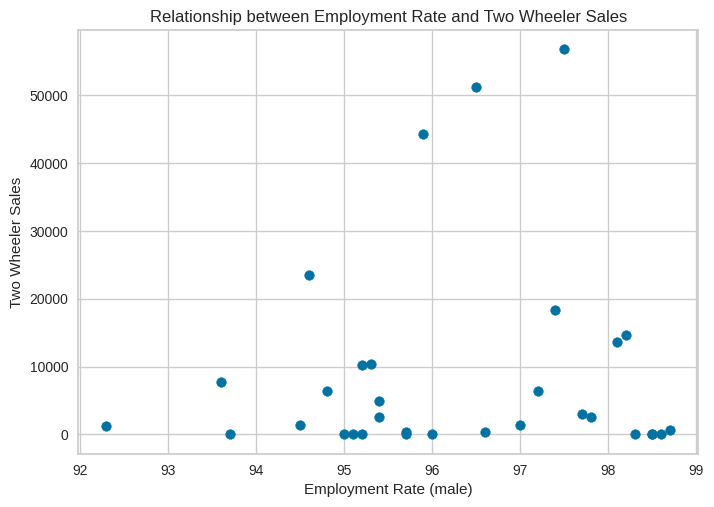

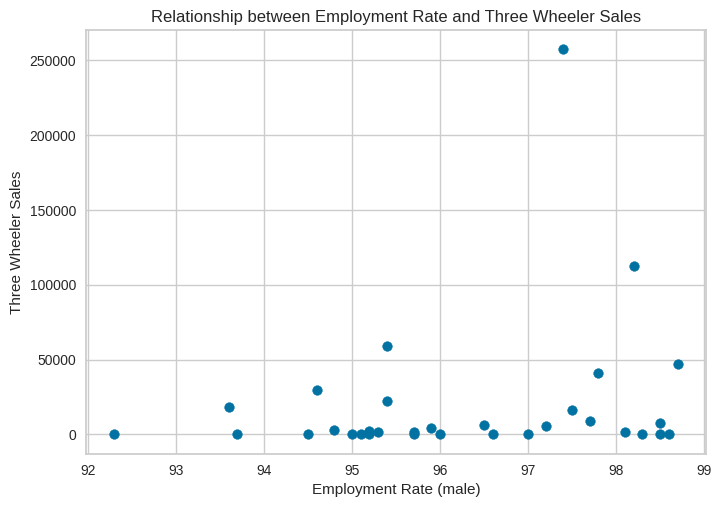

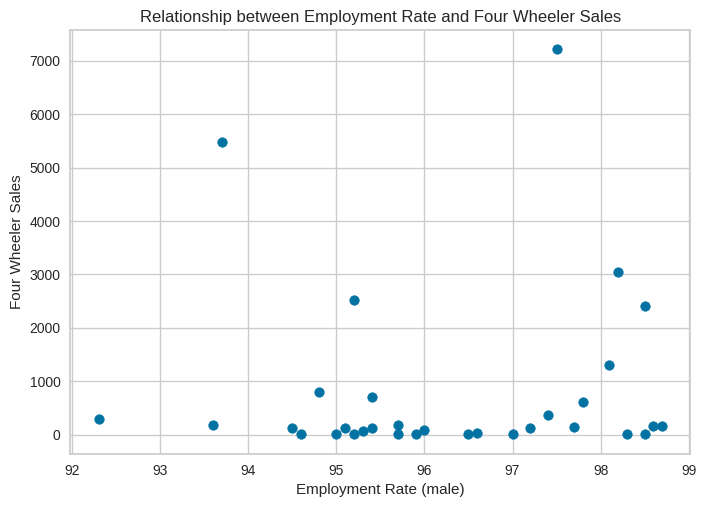

In [ ]:
# @title Male correlations scatter plot
# Visualize the relationship (example using a scatter plot)
# Use a for loop to create individual scatter plots
for column in ['Two Wheeler', 'Three Wheeler', 'Four Wheeler']:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(df_ev_sales['Rural + Urban - Male'], df_ev_sales[column])
    plt.xlabel('Employment Rate (male)')
    plt.ylabel(f'{column} Sales')
    plt.title(f'Relationship between Employment Rate and {column} Sales')
    plt.show()

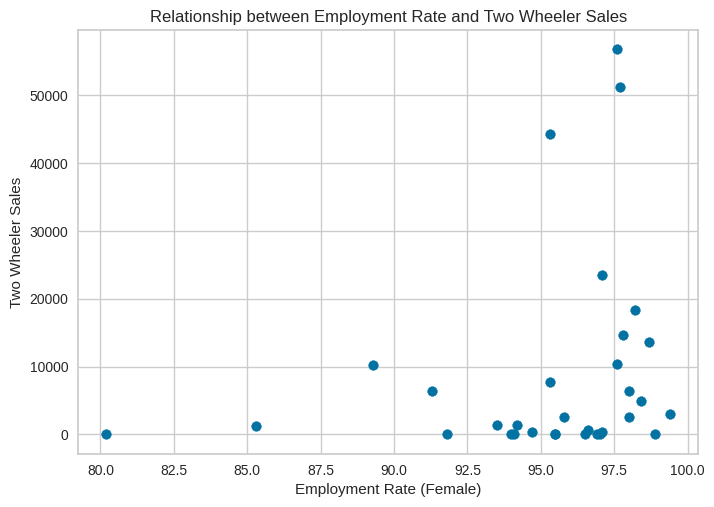

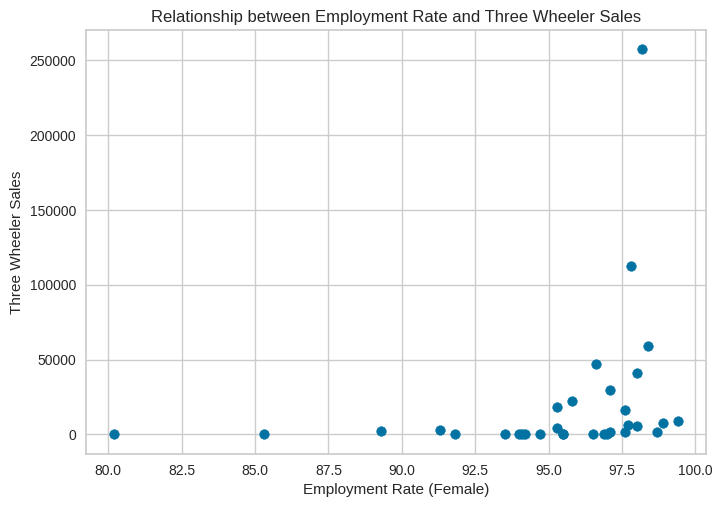

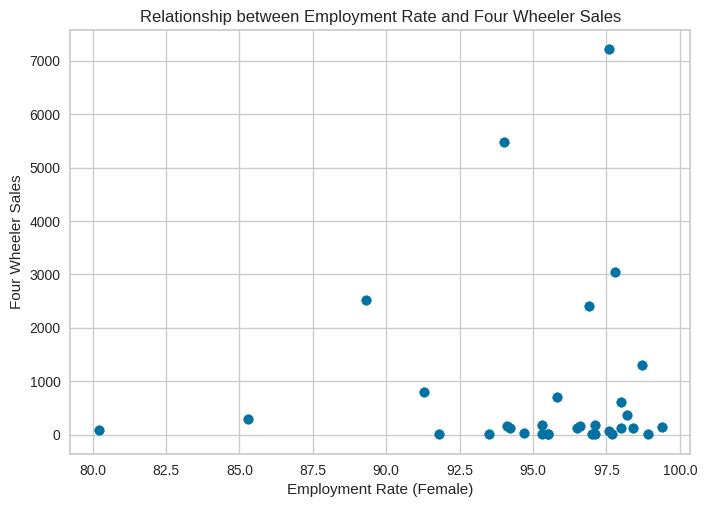

In [ ]:
# @title Female correlations scatter plots
# Visualize the relationship (example using a scatter plot)
# Use a for loop to create individual scatter plots
for column in ['Two Wheeler', 'Three Wheeler', 'Four Wheeler']:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(df_ev_sales['Rural + Urban - Female'], df_ev_sales[column])
    plt.xlabel('Employment Rate (Female)')
    plt.ylabel(f'{column} Sales')
    plt.title(f'Relationship between Employment Rate and {column} Sales')
    plt.show()

>2w
* Weak Negative Correlation: The scatter plot between Unemployment Rate (Male and Female) and Two Wheeler Sales shows a weak negative correlation. This suggests that as the unemployment rate for Male and Females increases, there's a slight tendency for Two Wheeler sales to decrease.
Outliers: There are a few outliers, particularly at higher unemployment rates, which might be influencing the overall correlation.
* Clustering: The data points seem to cluster in certain regions, indicating potential subgroups or patterns within the data.

>3W
* Weak Negative Correlation: The scatter plot between Unemployment Rate (Male and Female) and Three Wheeler Sales still shows a weak negative correlation. This suggests that as the unemployment rate for Male and Females increases, there's a slight tendency for Three Wheeler sales to decrease.
Outliers: There are a few outliers, particularly at higher unemployment rates, which might be influencing the overall correlation.
* Clustering: The data points seem to cluster in certain regions, indicating potential subgroups or patterns within the data.

>4W
* Weak Negative Correlation: The scatter plot between Unemployment Rate (Male and Female) and Four Wheeler Sales shows a weak negative correlation. This suggests that as the unemployment rate for Male and Females increases, there's a slight tendency for Four Wheeler sales to decrease.
Outliers: There are a few outliers, particularly at higher unemployment rates, which might be influencing the overall correlation.
* Clustering: The data points seem to cluster in certain regions, indicating potential subgroups or patterns within the data.

#Male Segment Extraction

In [ ]:
#copy'Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Male' from df1 to dfe

dfm = df1[['State Name','Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Male']].copy()


In [ ]:
clusters = ''

###Principle Component Analysis on male data


In [ ]:
X = dfm[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Male']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
from sklearn.cluster import KMeans # Import KMeans
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_pca) # Generate cluster assignments

# Create a DataFrame for PCA results
pca_dfm = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_dfm['Cluster'] = clusters

# Get PCA components (loadings)
components = pca.components_.T
loadings_dfm = pd.DataFrame(components, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print("PCA Loadings:")
loadings_dfm

PCA Loadings:


,PC1,PC2,PC3,PC4
Two Wheeler,0.624211,-0.307361,0.167197,0.698524
Three Wheeler,0.416120,0.560980,0.657566,-0.282404
Four Wheeler,0.558071,-0.463942,-0.235048,-0.646581
Rural + Urban - Male,0.354629,0.612853,-0.695991,0.119354


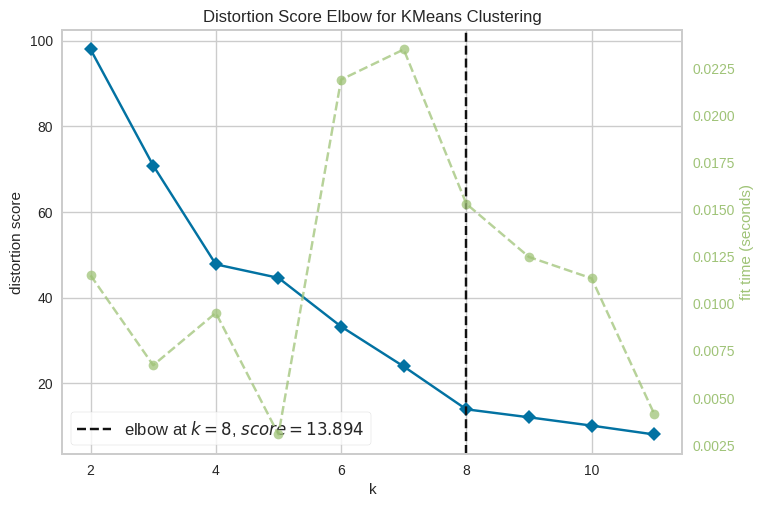

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfm[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Male']])

# Create a KMeans model
model = KMeans(random_state=42, n_init='auto')

# Use the KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(2,12))

# Fit the data to the visualizer
visualizer.fit(X_scaled)

# Render the plot
visualizer.show()


* Optimal number of segments at 8

##Segment Speration plot using PCA and K-Means (Profiling Segments)

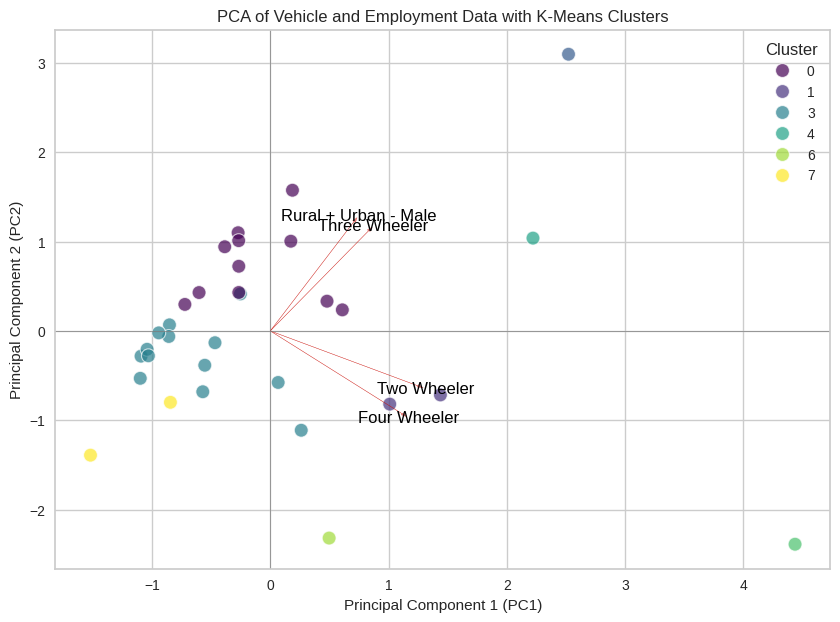

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 7))

# Scatter plot of PC1 vs PC2, colored by the K-Means cluster assignments
sns.scatterplot(x=pca_dfm['PC1'], y=pca_dfm['PC2'], hue=pca_dfm['Cluster'], palette='viridis', s=100, alpha=0.7)

# Add the PCA loadings as arrows
for i, feature in enumerate(loadings_dfm.index):
    plt.arrow(0, 0, loadings_dfm['PC1'][i]*2, loadings_dfm['PC2'][i]*2, color='r', alpha=0.5, head_width=0.03, head_length=0.05)
    plt.text(loadings_dfm['PC1'][i]*2.1, loadings_dfm['PC2'][i]*2.1, feature, color='black', ha='center', va='center', fontsize=12)

# Set labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Vehicle and Employment Data with K-Means Clusters')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

# Show the plot
plt.show()


>**Observations**:
* Cluster Formation: The data points are clustered into distinct groups, suggesting that K-means successfully identified meaningful segments in your data.
* Separation: The clusters appear to be reasonably well-separated, indicating that the chosen number of clusters (8) is appropriate.
* Variable Contributions: The arrows pointing from the origin to the variable labels (vehicle types and employment rates) show the direction and magnitude of their contributions to PC1 and PC2 And the Rural+Urban Male employment and Three Wheeler variables are more closely related as this might indicate to the higher sales of 3 wheeler overall and its Male population preference.

##Selecting the Target Segments

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dfm' with the cluster labels
dfm['Segments'] = clusters

# Group the data by cluster and calculate average values
# Exclude the 'State Name' column from the mean calculation
cluster_profiles = dfm.drop('State Name', axis=1).groupby('Segments').mean()

# Print the cluster profiles
cluster_profiles


,Two Wheeler,Three Wheeler,Four Wheeler,Rural + Urban - Male
Segments,,,,
0,2567.181818,10176.545455,452.090909,97.909091
1,47725.500000,5312.500000,7.500000,96.200000
2,18295.000000,257159.000000,368.000000,97.400000
3,4614.384615,9194.461538,365.923077,95.223077
4,14730.000000,112831.000000,3051.000000,98.200000
5,56737.000000,16478.000000,7212.000000,97.500000
6,12.000000,0.000000,5484.000000,93.700000
7,4545.500000,9311.500000,237.500000,92.950000



---
> Segment 0:  
* This Segment has a relatively high average number of "Three Wheeler" vehicles and a moderate number of "Two Wheeler" vehicles. The employment rate for males is slightly lower than in other Segments.

---
> Segment 1:  
* This Segment has a very high average number of "Two Wheeler" vehicles and a relatively low number of "Three Wheeler" and "Four Wheeler" vehicles. The male employment rate is slightly lower than in some other  Segments.

---
> Segment 2:  
* This Segment has an extremely high average number of "Three Wheeler" vehicles and a moderate number of "Two Wheeler" vehicles. The male employment rate is slightly higher than in some other Segments.

---
> Segment 3:  
* This Segment has a relatively high average number of "Three Wheeler" vehicles and a moderate number of "Two Wheeler" and "Four Wheeler" vehicles. The male employment rate is slightly lower than in some other  Segments.

---
> Segment 4:  
* This Segment has a very high average number of "Three Wheeler" vehicles and a moderate number of "Two Wheeler" vehicles. The male employment rate is slightly higher than in some other Segments.

---
> Segment 5:  
* This Segment has a very high average number of "Two Wheeler" vehicles and a moderate number of "Three Wheeler" and "Four Wheeler" vehicles. The male employment rate is slightly higher than in some other  Segments.

---
> Segment 6:  
* This Segment has a very high average number of "Four Wheeler" vehicles and almost no other vehicle types. The male employment rate is slightly lower than in some other Segments.

---
> Segment 7:  
* This Segment has a relatively high average number of "Two Wheeler" vehicles and a moderate number of "Three Wheeler" and "Four Wheeler" vehicles. The male employment rate is slightly lower than in some other Segments.
---

In [ ]:
# Filter the DataFrame for segments 4 and 5
segment_4_states = dfm[dfm['Segments'] == 4]['State Name']
segment_5_states = dfm[dfm['Segments'] == 5]['State Name']

# Create a DataFrame for the table
table_data = {'Segment 4': segment_4_states.tolist(), 'Segment 5': segment_5_states.tolist()}
table_df = pd.DataFrame(table_data)

# Display the table
table_df


,Segment 4,Segment 5
0,Delhi,Karnataka


---
> **Segment 5 appears to be a promising segment for EV market.**
  - States under the segment: `Karnataka.`


* High Prevalence of "Two Wheeler" and "Four Wheeler"  Vehicles: This suggests that there's a strong demand within this segment, making it a potential target for entry-level or budget-friendly and four wheeler EV models.
* Moderate Presence of Other Vehicle Types: The additional Presenece of "Three Wheeler" among other vehicles types indicates a diverse range of transportation needs within this segment. This could provide opportunities for a broader range of EV products.
* Slightly Higher Male Employment Rate: This might suggest a higher level of disposable income or purchasing power within this segment, making it a more attractive market for EV products.
---
> **Segment 4**
  - States under the segment: `Delhi.`

* Similar to Segment 5: Both segments have a high prevalence of "Two Wheeler" vehicles and moderate levels of other vehicle types.
---

#**Females Segment Extraction**

In [ ]:
#copy for female specific data from orginal dataframe

dfe = df1[['State Name','Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Female']].copy()


###K-Means elbow visualiser for optimal segments

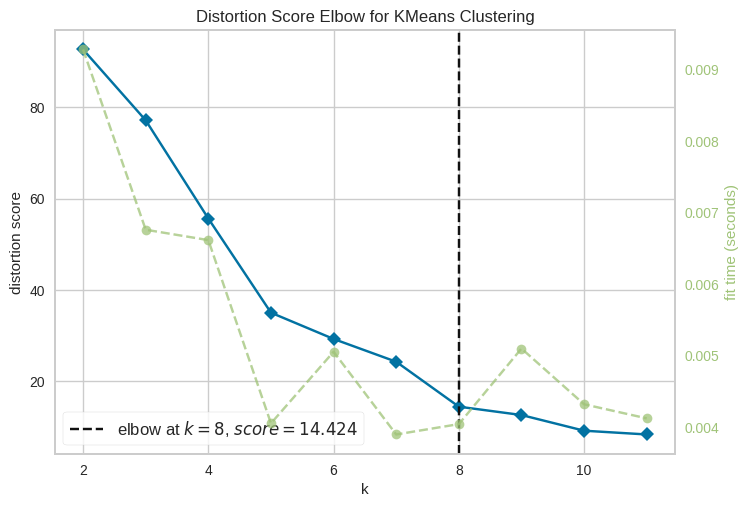

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfe[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Female']])

# Create a KMeans model
model = KMeans(random_state=42, n_init='auto')

# Use the KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(2,12))

# Fit the data to the visualizer
visualizer.fit(X_scaled)

# Render the plot
visualizer.show()


* Optimal number of segments at 8

In [ ]:
dfe.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Rural + Urban - Female
0,Andaman and Nicobar Island,1,30.0,81,80.2
1,Arunachal Pradesh,14,0.0,5,95.5
2,Assam,721,47041.0,161,96.6
3,Bihar,5003,59079.0,114,98.4
4,Chandigarh,298,1410.0,182,97.1


In [ ]:
clusters = ''

##Principle Component Analysis of female data

In [ ]:
# Perform PCA and K-Means

X = dfe[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Rural + Urban - Female']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
from sklearn.cluster import KMeans # Import KMeans
kmeans = KMeans(n_clusters=8, random_state=42) # You can adjust the number of clusters as needed
clusters = kmeans.fit_predict(X_pca) # Generate cluster assignments

# Create a DataFrame for PCA results
pca_dfe = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_dfe['Cluster'] = clusters

# Output the loadings for reference
# Get PCA components (loadings)
components = pca.components_.T
loadings_dfe = pd.DataFrame(components, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print("PCA Loadings:")
loadings_dfe

PCA Loadings:


,PC1,PC2,PC3,PC4
Two Wheeler,0.613495,0.289623,-0.114000,0.725773
Three Wheeler,0.419815,-0.555003,0.717845,-0.020637
Four Wheeler,0.469772,0.610047,0.179318,-0.612374
Rural + Urban - Female,0.476123,-0.485730,-0.662984,-0.312771


>PC1 and PC2 captures the most loadings.

* **PC1:** Vehicle Types: High loadings for "Two Wheeler" and "Four Wheeler" suggest that PC1 primarily captures variations in vehicle size or type.
Employment Rate: A positive loading for "Rural + Urban - Female" indicates that PC1 is associated with higher female employment rates.

##Segment Speration plot using PCA and K-Means (Profiling Segments)

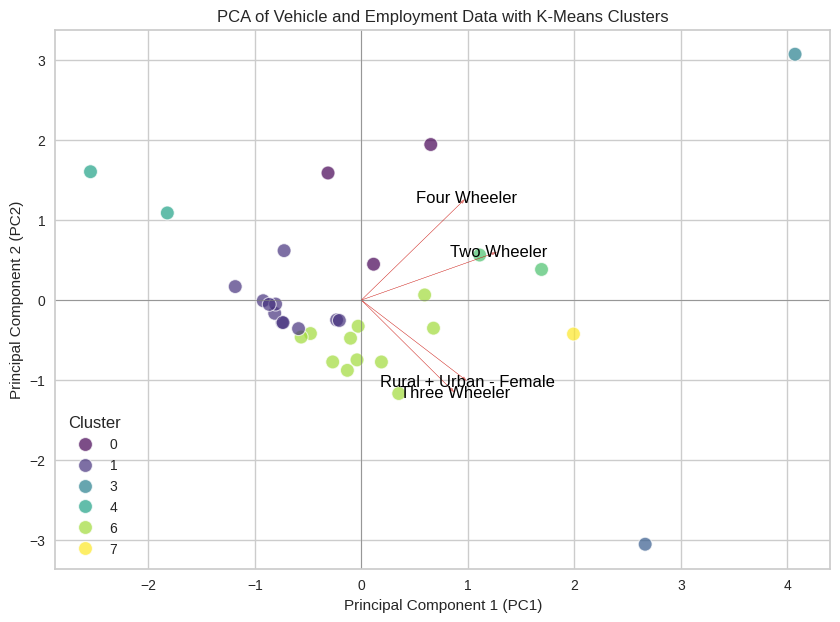

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 7))

# Scatter plot of PC1 vs PC2, colored by the K-Means cluster assignments
sns.scatterplot(x=pca_dfe['PC1'], y=pca_dfe['PC2'], hue=pca_dfe['Cluster'], palette='viridis', s=100, alpha=0.7)

# Add the PCA loadings as arrows
for i, feature in enumerate(loadings_dfe.index):
    plt.arrow(0, 0, loadings_dfe['PC1'][i]*2, loadings_dfe['PC2'][i]*2, color='r', alpha=0.5, head_width=0.03, head_length=0.05)
    plt.text(loadings_dfe['PC1'][i]*2.1, loadings_dfe['PC2'][i]*2.1, feature, color='black', ha='center', va='center', fontsize=12)

# Set labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Vehicle and Employment Data with K-Means Clusters')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

# Show the plot
plt.show()


>  Observations:

* Cluster Formation: The data points are clustered into distinct groups, suggesting that K-means successfully identified meaningful segments.
* Variable importance: The length of each arrow represents the strength of the feature's contribution to the principal components. Longer arrows indicate a stronger influence.
* Four Wheeler has a relatively longer arrow, meaning it has a strong influence on the variance captured by PC1.
* Rural + Urban - Female and Three Wheeler have shorter arrows, indicating lesser influence on the principal components.

In [ ]:
dfe.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Rural + Urban - Female
0,Andaman and Nicobar Island,1,30.0,81,80.2
1,Arunachal Pradesh,14,0.0,5,95.5
2,Assam,721,47041.0,161,96.6
3,Bihar,5003,59079.0,114,98.4
4,Chandigarh,298,1410.0,182,97.1


##Selecting the Target Segments

In [ ]:

dfe['Segment'] = clusters

# Group the data by cluster and calculate average values
# Exclude the 'State Name' column from the mean calculation
cluster_profiles = dfe.drop('State Name', axis=1).groupby('Segment').mean()

# Print the cluster profiles
cluster_profiles


,Two Wheeler,Three Wheeler,Four Wheeler,Rural + Urban - Female
Segment,,,,
0,3437.333333,705.000000,3474.000000,93.400000
1,1840.181818,4026.909091,195.909091,94.381818
2,18295.000000,257159.000000,368.000000,98.200000
3,56737.000000,16478.000000,7212.000000,97.600000
4,657.500000,29.000000,185.000000,82.750000
5,47725.500000,5312.500000,7.500000,96.500000
6,5950.909091,18511.272727,249.272727,97.890909
7,14730.000000,112831.000000,3051.000000,97.800000


In [ ]:
# Filter the DataFrame for segments 4 and 5
segment_7_states = dfe[dfe['Segment'] == 7]['State Name']
segment_3_states = dfe[dfe['Segment'] == 3]['State Name']

# Create a DataFrame for the table
# Use the from_dict method with orient='index' to handle uneven lengths
table_df = pd.DataFrame.from_dict({'Segment 7': segment_7_states, 'Segment 3': segment_3_states}, orient='index')

# Transpose the DataFrame to get the desired orientation
table_df = table_df.T
table_df.fillna('none', inplace=True)
# Display the table
table_df

,Segment 7,Segment 3
6,Delhi,none
13,none,Karnataka


---
> Segment 3 appears to be a promising segment for EV market.
 - States under the segment: Karnataka.

* This segment has a very high number of Two Wheelers, a considerable number of Four Wheelers, and a significant number of Three Wheelers. The female employment rate is high at 97.6%, reflecting areas with a high concentration of vehicles across all categories and a strong female workforce.
---
> Segment 7
 - States under the segment: Delhi.

* This segment has a higher number of Two Wheelers and Three Wheelers, with a relatively moderate number of Four Wheelers. The female employment rate is moderately high at 97.4%. This segment represents areas with balanced vehicle distribution
---

